###Demonstrate using the simulator at the region level with a stimulus.

``Run time``: approximately 7 min (workstation circa 2010).

``Memory requirement``: < 1GB

In [2]:
from tvb.simulator.lab import *

####Perform the simulation

In [3]:
LOG.info("Configuring...")

In [4]:
#Initialise a Model, Coupling, and Connectivity.
oscillator = models.Generic2dOscillator()
white_matter = connectivity.Connectivity(load_default=True)
white_matter.speed = numpy.array([4.0])

white_matter_coupling = coupling.Linear(a=0.0126)


In [5]:
#Initialise an Integrator
heunint = integrators.HeunDeterministic(dt=2 ** -4)

In [6]:
#Initialise some Monitors with period in physical time
momo = monitors.TemporalAverage(period=1.0)     # 1000Hz
mama = monitors.Bold(period=500)    # defaults to one data point every 500ms

#Bundle them
what_to_watch = (momo, mama)

In [7]:
#Define the stimulus
#Specify a weighting for regions to receive stimuli... 
white_matter.configure()    # Because we want access to number_of_regions
nodes = [0, 7, 13, 33, 42]
weighting = numpy.zeros((white_matter.number_of_regions, ))
weighting[nodes] = numpy.array([2.0 ** -2, 2.0 ** -3, 2.0 ** -4, 2.0 ** -5, 2.0 ** -6])

eqn_t = equations.Gaussian()
eqn_t.parameters["midpoint"] = 15000.0
eqn_t.parameters["sigma"] = 4.0

stimulus = patterns.StimuliRegion(temporal=eqn_t,
                                  connectivity=white_matter,
                                  weight=weighting)

In [8]:
#Initialise Simulator -- Model, Connectivity, Integrator, Monitors, and stimulus.
sim = simulator.Simulator(model=oscillator, connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint, monitors=what_to_watch,
                          stimulus=stimulus)

sim.configure()


In [9]:
LOG.info("Starting simulation...")
#Perform the simulation
tavg_time = []
tavg_data = []
bold_time = []
bold_data = []
for tavg, bold in sim(simulation_length=30000):
    
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])
    
    if not bold is None:
        bold_time.append(bold[0])
        bold_data.append(bold[1])

LOG.info("Finished simulation.")

####Plot pretty pictures of what we just did  

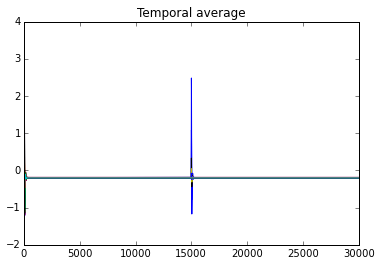

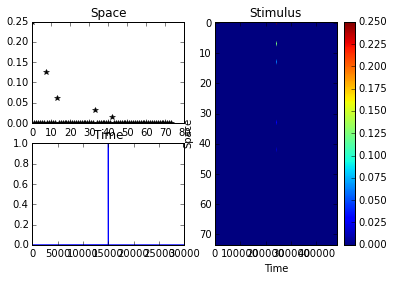

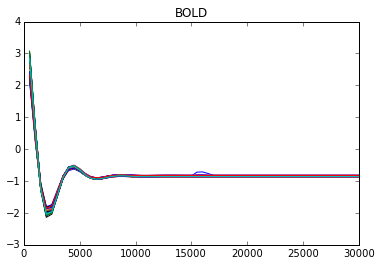

In [10]:
#Plot the stimulus
plot_pattern(sim.stimulus)

#Make the lists numpy.arrays for easier use.
TAVG = numpy.array(tavg_data)
BOLD = numpy.array(bold_data)

#Plot temporally averaged time series
figure(1)
plot(tavg_time, TAVG[:, 0, :, 0])
title("Temporal average")

#Plot bold time series
figure(2)
plot(bold_time, BOLD[:, 0, :, 0])
title("BOLD")

#Show them
show()
